In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tqdm
import numpy as np
import os

In [3]:
from datetime import datetime, timedelta
from tqdm.auto import tqdm

In [142]:
# 날짜, 시간, 시가, 고가, 저가, 종가, 거래량, 거래대금, 누적체결매도수량, 누적체결매수수량
def CsvToData2(data_type, high_rate, minimum_rate, profit_rate, loss_rate):
    file_path = '/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/{}'.format(data_type)

    nullim_points = list()
    labels = list()
    ret_data = list()

    for file_name in tqdm(os.listdir(file_path)):
        full_path = os.path.join(file_path, file_name)
        raw_df = pd.read_csv(full_path, encoding='euc-kr')
        transform1 = raw_df[(raw_df['시간'] < 1030)]
        transform2 = (transform1.groupby(by='날짜').count()['시간'] == 89)
        filtered_date = transform2.index[transform2].values

        if len(filtered_date) == 0:
            continue
        #yesterday = filtered_date[0]
        for j, today in enumerate(filtered_date):
            if j == 0:
                continue
            yesterday = datetime.strptime(str(today), "%Y%m%d") - timedelta(days=1)
            yesterday = int(datetime.strftime(yesterday, "%Y%m%d"))
            while yesterday not in raw_df['날짜'].values:
                yesterday = datetime.strptime(str(yesterday), "%Y%m%d") - timedelta(days=1)
                yesterday = int(datetime.strftime(yesterday, "%Y%m%d"))

            today_df = raw_df[(raw_df['날짜'] == today) & (raw_df['시간'] < 1030)].iloc[:,2:]
            today_start_price = raw_df[(raw_df['날짜'] == today) & (raw_df['시간'] == 901)]['시가'].values
            yesterday_end_price = raw_df[raw_df['날짜'] == yesterday].iloc[-1, 5]
            cond2 = (today_start_price < (yesterday_end_price * 1.20))
            cond3 = (today_start_price > 1200)
            if cond2==0 or cond3 == 0:
              continue
            high_point, nullim_point,label = 0,0,0
            for i in range(30):
                if today_start_price * (1 - minimum_rate) > today_df.iloc[i, 2]:
                    break
                if today_start_price * (1 + high_rate) < today_df.iloc[i, 3]:
                    high_point = i
                    break

            if high_point != 0 :
                high_val = today_df.iloc[high_point,3]
                cnt=0
                #null_rate4=0.8
                null_rate4=0.6
                #null_rate3=0.6
                #null_rate4=0.5
                for i in range(high_point+1, 59):
                    if today_df.iloc[i,1] > high_val:
                      high_val = today_df.iloc[i, 1]
                      nullim_point=0
                      cnt=0
                      if high_val> (today_start_price *(1 + high_rate+0.015)):
                        break
                      
                    if nullim_point==0:
                      if today_df.iloc[i,3] < (today_start_price+null_rate4*(high_val-today_start_price)):
                        nullim_point=i
                    else:
                      if today_df.iloc[i,3] < (today_start_price+(null_rate4+0.15)*(high_val-today_start_price)) and today_df.iloc[i,3] > (today_start_price+(null_rate4-0.15)*(high_val-today_start_price)):
                        cnt +=1
                      else:
                        nullim_point=0
                        cnt=0
                        continue 
                      if cnt ==5:
                        nullim_point=i
                        break
                if cnt!=5:
                  nullim_point=0
                '''
                if nullim_point==0:
                  high_val = today_df.iloc[high_point,3]
                  cnt=0
                  for i in range(high_point+1, 59):
                      if today_df.iloc[i,1] > high_val:
                        high_val = today_df.iloc[i, 1]
                        nullim_point=0
                        cnt=0
                        if high_val> (today_start_price * (1 + high_rate+0.015)):
                          break
                      if nullim_point==0:
                        if today_df.iloc[i,3] < (today_start_price+null_rate3*(high_val-today_start_price)):
                          nullim_point=i
                      else:
                        if today_df.iloc[i,3] < (today_start_price+(null_rate3+0.1)*(high_val-today_start_price)) and today_df.iloc[i,3] > (today_start_price+(null_rate3-0.1)*(high_val-today_start_price)):
                          cnt +=1
                        else:
                          nullim_point=0
                          cnt=0
                          continue 
                        if cnt ==2:
                          nullim_point=i
                          break
                  if cnt!=2:
                    nullim_point=0
                
                if nullim_point==0:
                  high_val = today_df.iloc[high_point,3]
                  cnt=0
                  for i in range(high_point+1, 59):
                      if today_df.iloc[i,1] > high_val:
                        high_val = today_df.iloc[i, 1]
                        nullim_point=0
                        cnt=0
                        if high_val> (today_start_price * (1 + high_rate+0.015)):
                          break
                      if nullim_point==0:
                        if today_df.iloc[i,3] < (today_start_price+null_rate2*(high_val-today_start_price)):
                          nullim_point=i
                      else:
                        if today_df.iloc[i,3] < (today_start_price+(null_rate2+0.1)*(high_val-today_start_price)) and today_df.iloc[i,3] > (today_start_price+(null_rate2-0.1)*(high_val-today_start_price)):
                          cnt +=1
                        else:
                          nullim_point=0
                          cnt=0
                          continue 
                        if cnt ==2:
                          nullim_point=i
                          break
                  if cnt!=2:
                    nullim_point=0
                if nullim_point==0:
                  high_val = today_df.iloc[high_point,3]
                  cnt=0
                  for i in range(high_point+1, 59):
                      if today_df.iloc[i,1] > high_val:
                        high_val = today_df.iloc[i, 1]
                        nullim_point=0
                        cnt=0
                        if high_val> (today_start_price * (1 + high_rate+0.015)):
                          break
                      if nullim_point==0:
                        if today_df.iloc[i,3] < (today_start_price+null_rate1*(high_val-today_start_price)):
                          nullim_point=i
                      else:
                        if today_df.iloc[i,3] < (today_start_price+(null_rate1+0.1)*(high_val-today_start_price)) and today_df.iloc[i,3] > (today_start_price+(null_rate1-0.1)*(high_val-today_start_price)):
                          cnt +=1
                        else:
                          nullim_point=0
                          cnt=0
                          continue 
                        if cnt ==2:
                          nullim_point=i
                          break
                  if cnt!=2:
                    nullim_point=0
                  '''
            if nullim_point != 0 :
                for i in range(nullim_point+1, 89):
                    if today_df.iloc[i, 2] < today_df.iloc[nullim_point,3] * (1 - loss_rate):
                        break
                    if today_df.iloc[i, 1] > today_df.iloc[nullim_point,3] * (1 + profit_rate):
                        label = 1
                        break
                '''
                yesterday_df = raw_df[raw_df['날짜'] == yesterday].iloc[:nullim_point, 2:]
                today_trade = today_df['거래량'][:nullim_point].mean()
                yesterday_trade = yesterday_df['거래량'].mean()
                cond1 = (today_trade > (yesterday_trade *1.5))

                if cond1:
                '''
                nullim_points.append(nullim_point)
                labels.append(label)
                ret_data.append(today_df.values.tolist())
            #yesterday = today

    return nullim_points, labels, ret_data

In [143]:
kosdaq1_bps, kosdaq1_lables, kosdaq1_data = CsvToData2('kosdaq', 0.04, 0.01, 0.01, 0.01)

In [144]:
 np.array(kosdaq1_bps).shape, np.array(kosdaq1_lables).shape, np.array(kosdaq1_data).shape

((1051,), (1051,), (1051, 89, 8))

In [118]:
kosdaq2_bps, kosdaq2_labels, kosdaq2_data = CsvToData2('kosdaq2', 0.04, 0.01, 0.01, 0.01)

In [119]:
np.array(kosdaq2_bps).shape, np.array(kosdaq2_labels).shape, np.array(kosdaq2_data).shape

((1550,), (1550,), (1550, 89, 8))

In [120]:
kosdaq_bps = np.concatenate((kosdaq1_bps, kosdaq2_bps), axis=0)
kosdaq_labels = np.concatenate((kosdaq1_lables, kosdaq2_labels), axis=0)
kosdaq_data = np.concatenate((kosdaq1_data, kosdaq2_data), axis=0)

In [145]:
sum(np.array(kosdaq1_lables)==0),sum(np.array(kosdaq1_lables)==1)#,sum(np.array(kosdaq1_lables)==2)

(617, 434)

In [122]:
sum(np.array(kosdaq2_labels)==0),sum(np.array(kosdaq2_labels)==1)#,sum(np.array(kosdaq2_labels)==2)

(635, 915)

In [132]:
sum(kosdaq1_lables) / kosdaq1_lables.__len__(), sum(kosdaq2_labels) / kosdaq2_labels.__len__()

(0.4215686274509804, 0.5903225806451613)

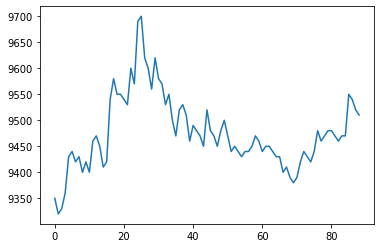

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.hist(np.array(kosdaq1_bps))
plt.plot(np.array(kosdaq1_data[9])[:,3])

In [125]:
from sklearn.model_selection import train_test_split
whole_ind = np.arange(kosdaq_data.shape[0])
train_ind, val_ind, train_labels, val_labels = train_test_split(whole_ind, kosdaq_labels, test_size=0.1, random_state = 42)
train_ind, test_ind, train_labels, test_labels = train_test_split(train_ind, train_labels, test_size=0.1, random_state = 42)

In [59]:
train = kosdaq_data[train_ind]
val = kosdaq_data[val_ind]
test = kosdaq_data[test_ind]

train_break_points = kosdaq_bps[train_ind]
val_break_points = kosdaq_bps[val_ind]
test_break_points = kosdaq_bps[test_ind]

In [60]:
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/train_data_눌림목오전.npy', train)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/val_data_눌림목오전.npy', val)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/test_data_눌림목오전.npy', test)

np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/train_labels_눌림목오전.npy', train_labels)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/val_labels_눌림목오전.npy', val_labels)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/test_labels_눌림목오전.npy', test_labels)

np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/train_nullim_points_눌림목오전.npy', train_break_points)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/val_nullim_points_눌림목오전.npy', val_break_points)
np.save('/content/drive/MyDrive/인공지능 온라인 경진대회/주식/data/test_nullim_points_눌림목오전.npy', test_break_points)